In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline

In [3]:
# Load train and test data
train_data = pd.read_csv("../data/train_data.csv")
test_data = pd.read_csv("../data/test_data.csv")

print(train_data.head())

# Split train and test data into features and targets
train_features = train_data["lyrics"]
train_targets = train_data["most_common_genre"]

test_features = test_data["lyrics"]
test_targets = test_data["most_common_genre"]

categories = sorted(list(train_targets.unique()))

def print_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=categories)
    print(report)
    sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

                       id                                             lyrics  \
0  1FAmKoufyAXMfzPPs9bsjA  i tied my bandana took my pack from the floor ...   
1  3QvPEv8XjHa73iYhaienWw  i want to live on the moon never see a human a...   
2  5VPFATm85G3P04Q5g8yxqr  bitch you know you can t parallel park anyway ...   
3  7J2jCftItt7htcOUdcMnpt  graceless falling slipping in the cold with no...   
4  4cBPzVIbDIQx0LIyauFAy0  madame morse estate stood five hundred years p...   

       artist_name most_common_genre  \
0  Waylon Jennings           country   
1   Phantom Planet              rock   
2    Isaiah Rashad           hip-hop   
3     Matt Pond PA             indie   
4       Ariel Pink               pop   

                                          genre_list  
0  ['country', 'country', 'rock', 'outlaw', 'coun...  
1                                    ['pop', 'rock']  
2  ['hip-hop', 'rap', 'tennessee', 'hip-hop', 'un...  
3                                ['philly', 'indie']  
4  

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

(19052, 57574) (4763, 57574)


              precision    recall  f1-score   support

   christian       0.67      0.34      0.45       265
     country       0.59      0.27      0.37       436
     hip-hop       0.52      0.52      0.52       398
       indie       0.31      0.09      0.13       493
       metal       0.64      0.46      0.54       414
         pop       0.37      0.51      0.43       919
        punk       0.44      0.03      0.06       217
         rap       0.56      0.64      0.60       313
        rock       0.37      0.65      0.47      1113
        soul       0.67      0.04      0.08       195

    accuracy                           0.43      4763
   macro avg       0.51      0.36      0.37      4763
weighted avg       0.46      0.43      0.40      4763



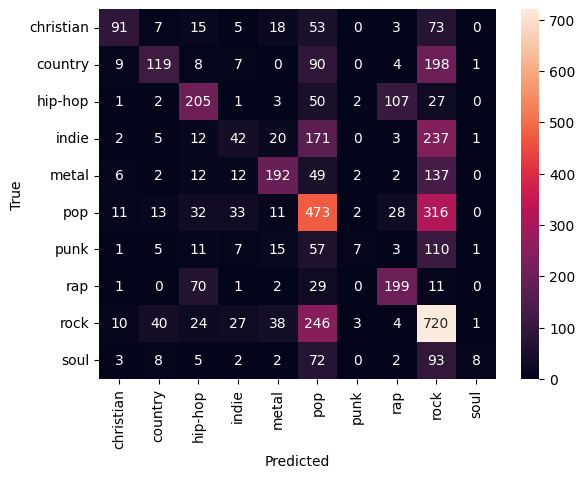

In [5]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=.01)
clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)

In [6]:
import numpy as np
def show_top10(classifier, vectorizer, categories):
     feature_names = np.asarray(vectorizer.get_feature_names())
     for i, category in enumerate(categories):
         top10 = np.argsort(classifier.feature_log_prob_[i])[-10:]
         print("%s: %s" % (category, " ".join(feature_names[top10])))
        
show_top10(clf,vectorizer, train_targets.unique())

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

              precision    recall  f1-score   support

   christian       0.62      0.46      0.53       265
     country       0.50      0.46      0.48       436
     hip-hop       0.56      0.51      0.53       398
       indie       0.27      0.19      0.22       493
       metal       0.53      0.50      0.51       414
         pop       0.39      0.48      0.43       919
        punk       0.21      0.08      0.12       217
         rap       0.55      0.53      0.54       313
        rock       0.42      0.56      0.48      1113
        soul       0.31      0.13      0.19       195

    accuracy                           0.44      4763
   macro avg       0.44      0.39      0.40      4763
weighted avg       0.43      0.44      0.43      4763



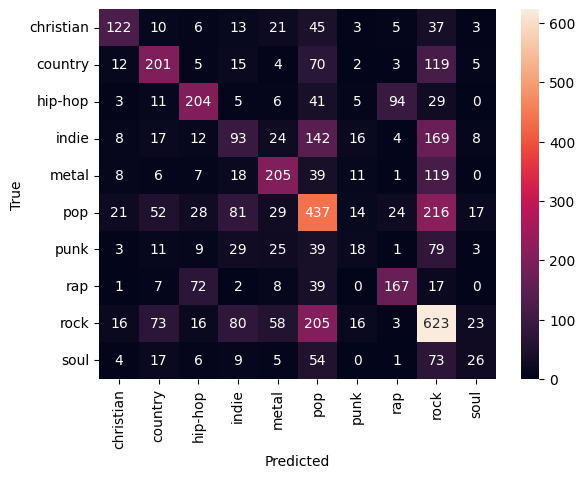

In [7]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)

print_report(test_targets, pred)

(19052, 10326874) (4763, 10326874)
              precision    recall  f1-score   support

   christian       0.57      0.45      0.50       265
     country       0.50      0.49      0.50       436
     hip-hop       0.43      0.52      0.47       398
       indie       0.43      0.11      0.18       493
       metal       0.60      0.55      0.57       414
         pop       0.38      0.59      0.46       919
        punk       0.33      0.02      0.03       217
         rap       0.49      0.62      0.55       313
        rock       0.47      0.53      0.50      1113
        soul       0.41      0.13      0.20       195

    accuracy                           0.46      4763
   macro avg       0.46      0.40      0.40      4763
weighted avg       0.46      0.46      0.43      4763



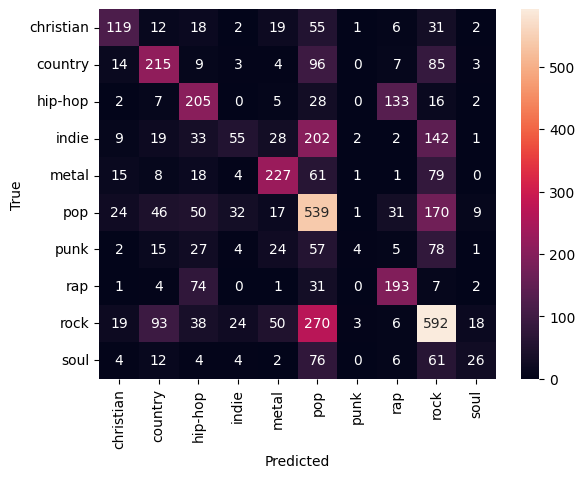

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1,5))
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)

(19052, 6320460) (4763, 6320460)
              precision    recall  f1-score   support

   christian       0.55      0.49      0.52       265
     country       0.44      0.48      0.46       436
     hip-hop       0.50      0.52      0.51       398
       indie       0.31      0.08      0.13       493
       metal       0.57      0.55      0.56       414
         pop       0.39      0.57      0.46       919
        punk       0.42      0.05      0.08       217
         rap       0.51      0.64      0.57       313
        rock       0.45      0.50      0.47      1113
        soul       0.41      0.16      0.23       195

    accuracy                           0.45      4763
   macro avg       0.45      0.40      0.40      4763
weighted avg       0.44      0.45      0.42      4763



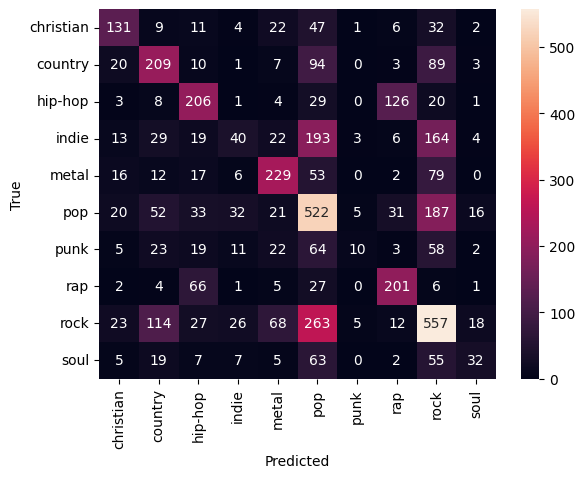

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(1,5), stop_words='english')
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)

In [10]:
context_features = FeatureUnion(
        transformer_list=[
            ('word1', TfidfVectorizer(ngram_range=(1, 7),lowercase=True)),
            ('word2', TfidfVectorizer(ngram_range=(1, 3),lowercase=True)),
            ('word3', TfidfVectorizer(ngram_range=(1, 5),lowercase=False)),
            ('char', TfidfVectorizer(lowercase=False, analyzer='char', ngram_range=(2, 3)))])

              precision    recall  f1-score   support

   christian       0.56      0.49      0.53       265
     country       0.58      0.46      0.51       436
     hip-hop       0.51      0.48      0.49       398
       indie       0.39      0.13      0.20       493
       metal       0.58      0.54      0.56       414
         pop       0.41      0.54      0.47       919
        punk       0.26      0.04      0.06       217
         rap       0.51      0.67      0.58       313
        rock       0.44      0.60      0.51      1113
        soul       0.36      0.17      0.23       195

    accuracy                           0.47      4763
   macro avg       0.46      0.41      0.41      4763
weighted avg       0.46      0.47      0.44      4763



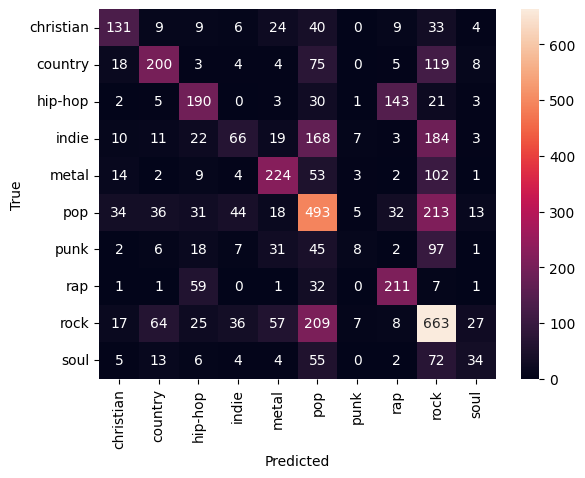

In [11]:
clf = make_pipeline(context_features, LinearSVC())
clf.fit(train_features, train_targets)
pred = clf.predict(test_features)
print_report(test_targets, pred)

In [12]:
clf.score(test_features, test_targets)

0.46609279865630904

In [13]:
clf.steps[1]

('linearsvc', LinearSVC())